In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px

import sys
from pathlib import Path

# add parent folder to the path
module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.load_gfa import load_gfa

## Didelot

In [3]:
didelot=pd.read_csv("didelot-summary-gfa.csv")
didelot

,Unnamed: 0,tool,gfa_id,msa,obj_function,penalization,min_len,len_graph,n_nodes,n_edges,is_acyclic,weakly_connected_components,len_shared_nodes,perc_len_shared_nodes
0,0,pangeblocks,coli27-86,mafft.op1.53-ep0,weighted,3,5,4300,2238.0,3074,acyclic,1.0,2581,60.02
1,1,pangeblocks,slpa-simu,mafft.op1.53-ep0,weighted,3,5,8647,6113.0,10994,acyclic,1.0,274,3.17
2,2,pangeblocks,slpa-real,mafft.op1.53-ep0,weighted,3,5,8477,4559.0,8144,acyclic,1.0,547,6.45
3,3,pangeblocks,slpa-basis,mafft.op1.53-ep0,weighted,3,5,5831,4560.0,7663,acyclic,1.0,554,9.50
4,4,pangeblocks,slpa-simu,mafft.op1.53-ep0,weighted,7,3,8818,6133.0,11021,acyclic,1.0,274,3.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,makeprg,slpa-simu,mafft.op5-ep0,makeprg,0,0,63711,2247.0,3209,acyclic,10.0,-1,-1.00
156,156,pggb,coli27-86,wfmash,pggb,0,0,4328,2204.0,3022,acyclic,1.0,2506,57.90
157,157,pggb,slpa-real,wfmash,pggb,0,0,23376,2339.0,3209,acyclic,1.0,0,0.00
158,158,pggb,slpa-basis,wfmash,pggb,0,0,21277,588.0,806,acyclic,1.0,0,0.00


## Distribution of nodes

In [4]:
from utils.load_gfa import load_gfa
from collections import namedtuple, defaultdict

In [5]:
path_gfa0 = "/data/pangeblocks-experiments/didelot-pangeblocks/output-didelot-mafft.op1.53-ep0/gfa-unchop/nodes/penalization0-min_len0/coli27-86.fasta.gfa"
path_gfa1 = "/data/pangeblocks-experiments/didelot-makeprg/output-didelot-mafft.op1.53-ep0/coli27-86.fasta.gfa"
path_gfa2 = "/data/pangeblocks-experiments/didelot-PanPA/output-didelot-mafft.op1.53-ep0/coli27-86.fasta.gfa"
path_gfa3 = "/data/pangeblocks-experiments/didelot-pggb/coli27-86/coli27-86.fa.gz.269940d.417fcdf.a8b8a10.smooth.final.gfa"

In [6]:
paths_gfa=[path_gfa0, path_gfa3]# path_gfa3]

In [7]:
d = []
Data = namedtuple("Data",["gfa_id","len_node"])
for n,path_gfa in enumerate(paths_gfa):
    gfa_id = n#Path(path_gfa).stem + "-" + Path(path_gfa0).parents[-4].stem
    nodes, edges, paths = load_gfa(path_gfa)
    
    for idnode, node in nodes.items():
        d.append(Data(gfa_id, node["len"]))
    # d[f"gfa{n}"] = [v["len"] for v in nodes.values()]


In [8]:
df = pd.DataFrame(d)
df.describe()

,gfa_id,len_node
count,4442.000000,4442.000000
mean,0.496173,1.941468
std,0.500042,3.136495
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,2.000000
max,1.000000,114.000000


/tmp/ipykernel_2430245/1949277622.py:1: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  fig = sns.histplot(data=df, x="len_node", hue="gfa_id", multiple="dodge", palette=sns.color_palette("tab10"), log_scale=(False, True))


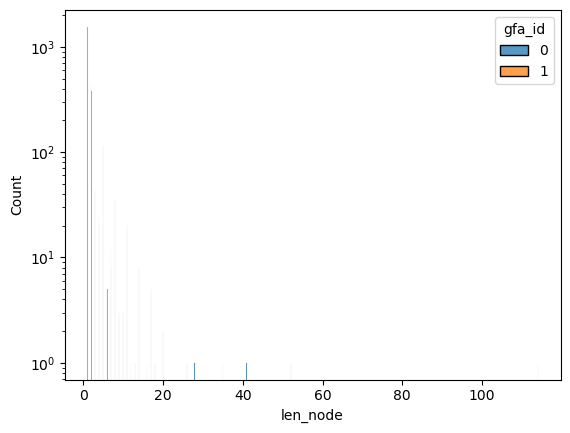

In [9]:
fig = sns.histplot(data=df, x="len_node", hue="gfa_id", multiple="dodge", palette=sns.color_palette("tab10"), log_scale=(False, True))

In [10]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [11]:
# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
# g = sns.FacetGrid(df, row="gfa_id", hue="gfa_id", aspect=5, height=2, palette=pal)

# # Draw the densities in a few steps
# g.map(sns.kdeplot, "len_node",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.kdeplot, "len_node", clip_on=False, color="w", lw=2, bw_adjust=.5)

# # passing color=None to refline() uses the hue mapping
# g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# # Define and use a simple function to label the plot in axes coordinates
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, fontweight="bold", color=color,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, "len_node")

# # Set the subplots to overlap
# g.figure.subplots_adjust(hspace=-.45)

# # Remove axes details that don't play well with overlap
# g.set_titles("")
# g.set(yticks=[], ylabel="")
# g.despine(bottom=True, left=True)

## Node depth distribution
node depth: number of sequences using the node
https://seaborn.pydata.org/tutorial/distributions.html#tutorial-hist

In [12]:
import pandas as pd 
import seaborn as sns

In [35]:
def get_node_depth(path_gfa, tool=None, normalize=False):
    nodes, edges, paths = load_gfa(path_gfa, return_nodes_path=True)

    node_depth = defaultdict(int)
    for seq_id, nodes in paths.items():
        for node in nodes: 
            node_depth[node] += 1

    df_depth = pd.DataFrame(node_depth.items(), columns=["nodeid", "node_depth"],)
    if tool: 
        df_depth["tool"] = tool
    
    if normalize is True:
        df_depth["norm_node_depth"] = df_depth["node_depth"] / len(nodes)
    return df_depth

In [58]:
df_depth = pd.concat([get_node_depth(p, tool=tool, normalize=True) for p, tool in zip([path_gfa0, path_gfa2], ["pangeblocks", "panpa"])])
df_depth

,nodeid,node_depth,tool,norm_node_depth
0,1970,27,pangeblocks,0.019369
1,2,26,pangeblocks,0.018651
2,2230,27,pangeblocks,0.019369
3,4,26,pangeblocks,0.018651
4,5,27,pangeblocks,0.019369
...,...,...,...,...
2249,4180,1,panpa,0.000705
2250,1450,1,panpa,0.000705
2251,1494,1,panpa,0.000705
2252,2683,1,panpa,0.000705


<Axes: xlabel='node_depth', ylabel='Density'>

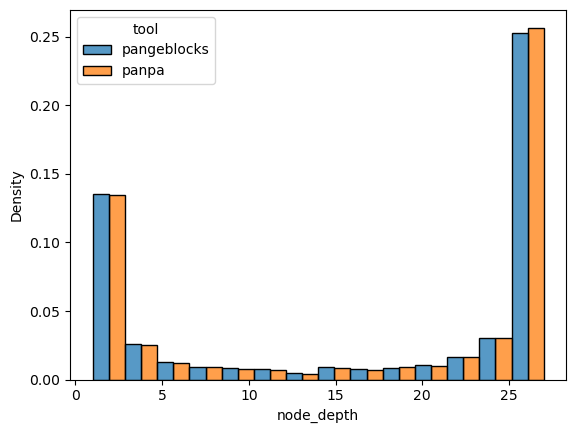

In [59]:
sns.histplot(df_depth, x="node_depth", hue="tool", multiple="dodge", stat="density", common_norm=False,)